In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import pandas as pd

In [2]:
path = "/home/fede/ictp/active_matter_simulations/simulation_results/"
files = sorted(f for f in os.listdir(path) if f.endswith(".npz"))

np.sum(np.load(os.path.join(path, files[0]))["escaped_particles"])

72

In [3]:
np.load(os.path.join(path, files[0]))["time"]

array([0.00000e+00, 1.00000e-03, 2.00000e-03, ..., 4.99998e+02,
       4.99999e+02, 5.00000e+02])

In [4]:
def load_simulation_data(file_path):
    data = np.load(file_path)

    row = {}
    row["file"] = os.path.basename(file_path)

    params_keys = data["params_keys"]
    params_values = data["params_values"]
    params_dict = dict(zip(params_keys, params_values))

    for key, value in params_dict.items():
        row[key] = value

    mean_esc_t = np.mean(data["escape_times"])
    esc_p = np.sum(data["escaped_particles"])

    row["Mean escape times"] = mean_esc_t
    row["Number of escaped particles"] = esc_p

    sim_times = data["time"]
    row["Time steps"] = sim_times

    msd = data["msd_t"]
    row["MSD"] = msd
    
    return row

In [5]:
def load_all_results_and_data_frame(path): #should modify this one to just filter from some parameters? maybe another 
    rows = []                              # function to filter data frames of this
    for file_name in os.listdir(path):
        if file_name.endswith(".npz"):
            full_path = os.path.join(path, file_name)
            try :
                row = load_simulation_data(full_path)
                rows.append(row)
            except Exception as e:
                print(f"Error procesando {fname}: {e}")

    df = pd.DataFrame(rows)
    return df

In [6]:
# for i in range(len(files)): 
#     file_i = os.path.join(path, files[i])
#     data_i = np.load(file_i)

results_df = load_all_results_and_data_frame(path)
results_df.columns

Index(['file', 'N_traj', 'N_steps', 'V_run', 'dt', 'x0', 'T', 'v0',
       'alpha_tumbling', 'alpha_potential', 'omega0', 'Mean escape times',
       'Number of escaped particles', 'Time steps', 'MSD'],
      dtype='object')

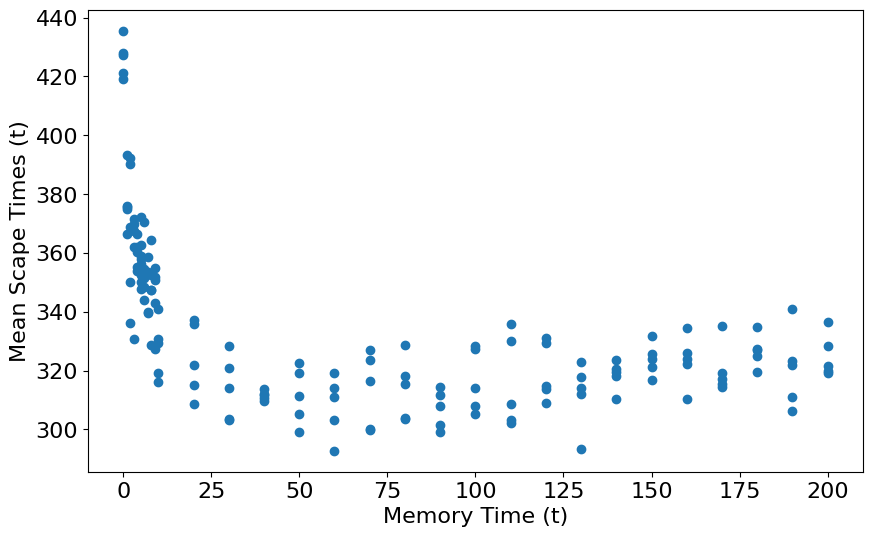

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(results_df["T"], results_df["Mean escape times"])
plt.xlabel("Memory Time (t)", fontsize = 16)
plt.ylabel("Mean Scape Times (t)", fontsize = 16)
plt.tick_params(axis='both', labelsize=16)

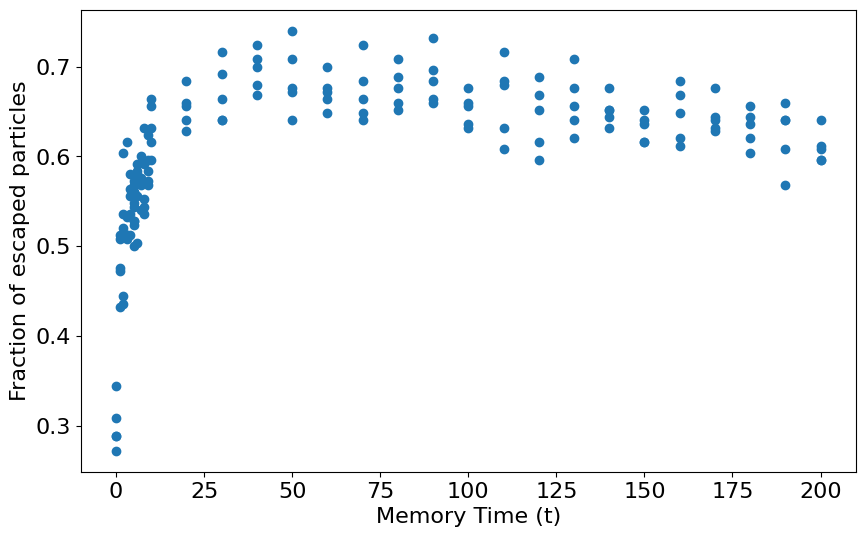

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(results_df["T"], results_df["Number of escaped particles"] / results_df['N_traj'])
plt.xlabel("Memory Time (t)", fontsize = 16)
plt.ylabel("Fraction of escaped particles", fontsize = 16)
plt.tick_params(axis='both', labelsize=16)

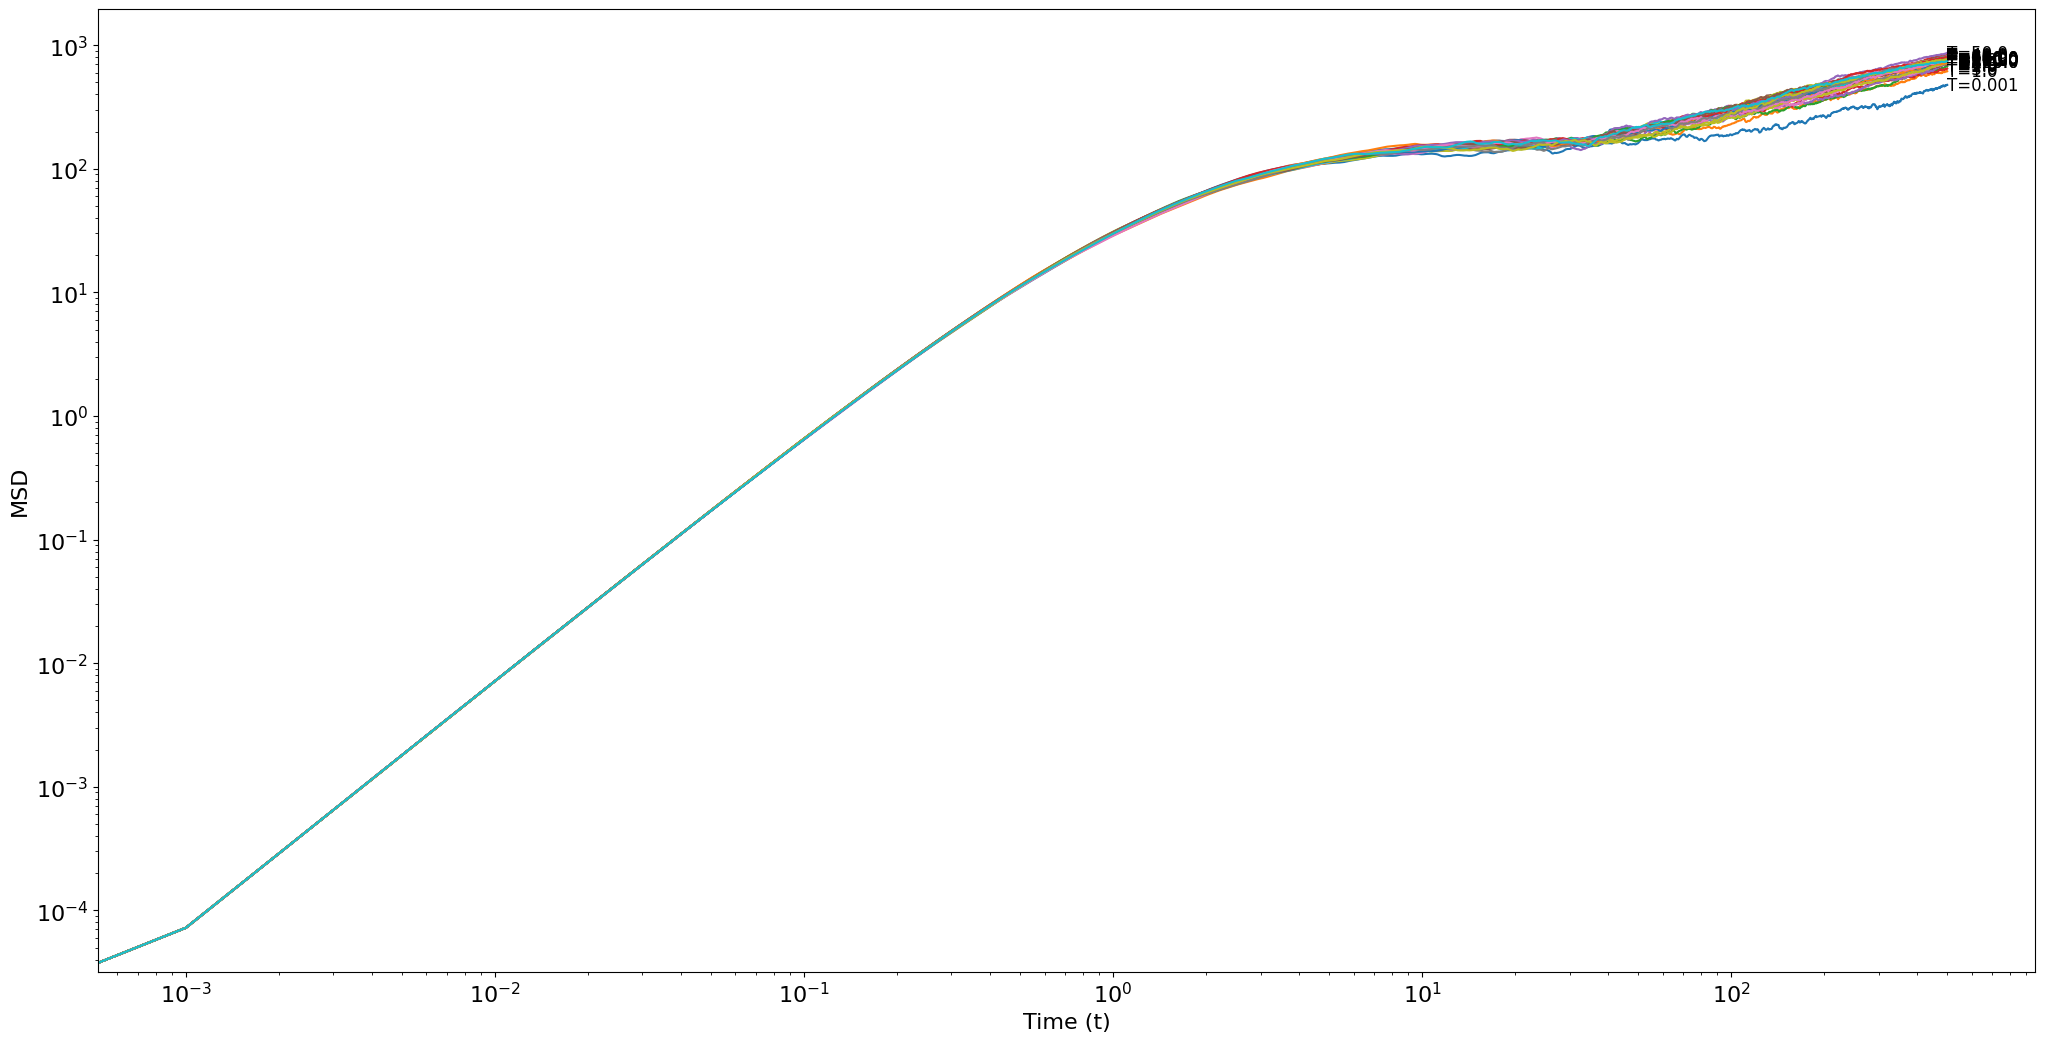

In [13]:
groups_by_T = results_df.groupby("T")

plt.figure(figsize=(25, 12.5))

for T_value, group in groups_by_T:
    row = group.iloc[0]
    time = row["Time steps"]
    msd  = row["MSD"]
    escaped_particles = row["Number of escaped particles"]
    met = round(row["Mean escape times"], 3)

    # Graficar curva
    plt.plot(time, msd)

    # Elegir la posición para el texto (último punto de la curva)
    x_text = time[-1]
    y_text = msd[-1]

    label_text = f"T={T_value}"

    # Texto sobre el gráfico
    plt.text(
        x_text, y_text,
        label_text,
        fontsize=12,
        verticalalignment="center",
        horizontalalignment="left"
    )

plt.xlabel("Time (t)", fontsize=16)
plt.ylabel("MSD", fontsize=16)
plt.tick_params(axis='both', labelsize=16)
plt.xscale("log")
plt.yscale("log")
plt.show()